# 🎬 Netflix Exploratory Data Analysis (EDA)

### Objective:
This project explores the Netflix dataset, which contains details about movies and TV shows available on the platform.  
We aim to uncover insights related to:
- Content trends
- Genre popularity
- Ratings distribution
- Country-wise availability

---

### Dataset Source:
[Netflix Movies and TV Shows dataset on Kaggle](https://www.kaggle.com/shivamb/netflix-shows)

---


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
plt.style.use('seaborn-v0_8')
sns.set_palette('pastel')

print("✅ Libraries loaded successfully!")


✅ Libraries loaded successfully!


In [3]:
# Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Display first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Basic information
df.info()

# Summary statistics (for numerical data)
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [5]:
# Missing values count
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# Fill missing values
df['country'].fillna('Unknown', inplace=True)
df['cast'].fillna('No Cast Info', inplace=True)
df['director'].fillna('No Director Info', inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

print("✅ Missing values handled and duplicates removed.")


✅ Missing values handled and duplicates removed.


C:\Users\resha\AppData\Local\Temp\ipykernel_20336\1638282110.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
C:\Users\resha\AppData\Local\Temp\ipykernel_20336\1638282110.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [7]:
print(f"Total Titles: {len(df)}")
print(f"Movies: {len(df[df['type']=='Movie'])}")
print(f"TV Shows: {len(df[df['type']=='TV Show'])}")


Total Titles: 8807
Movies: 6131
TV Shows: 2676


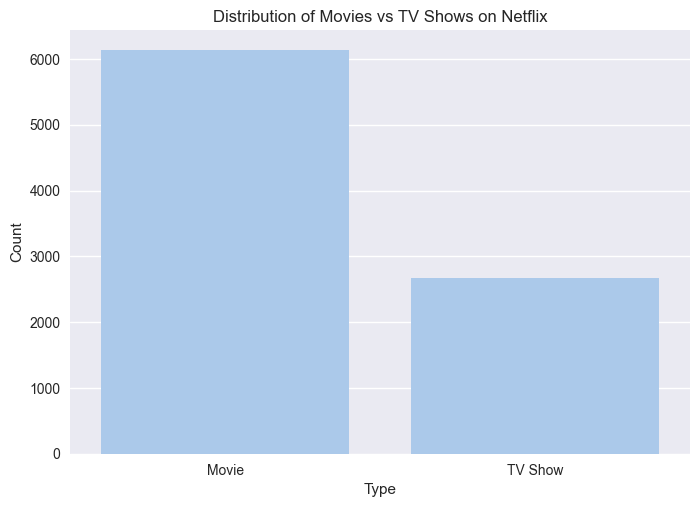

In [8]:
sns.countplot(data=df, x='type')
plt.title("Distribution of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


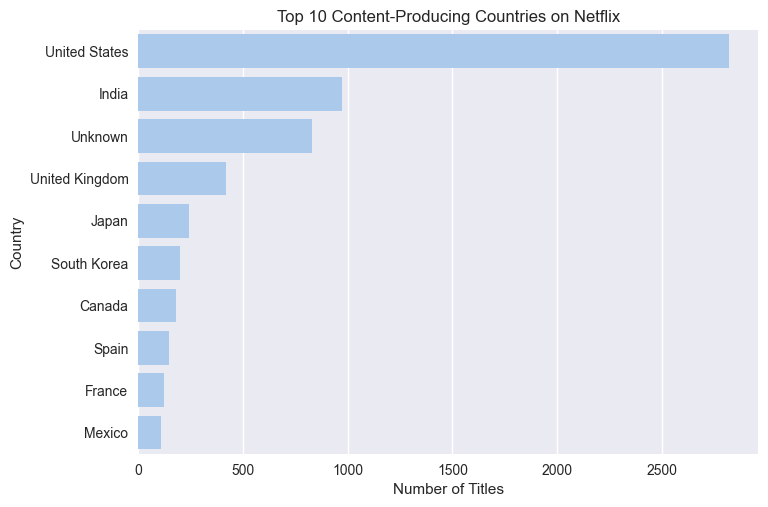

In [9]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title("Top 10 Content-Producing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


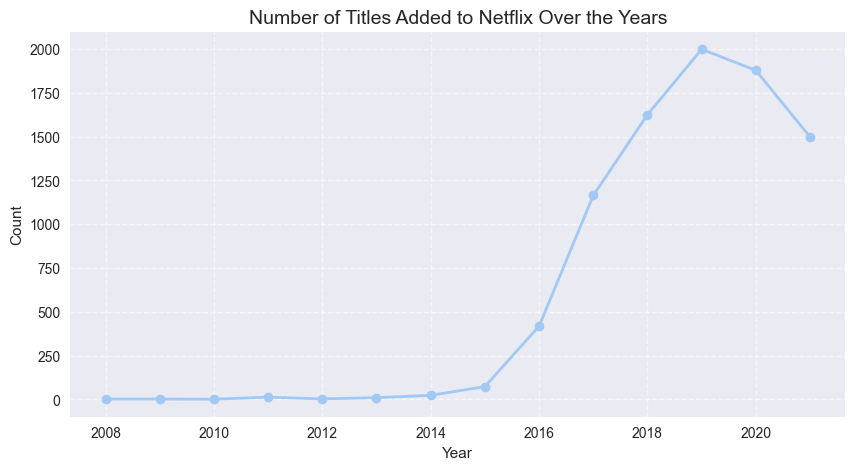

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df = df.dropna(subset=['year_added'])
df['year_added'] = df['year_added'].astype(int)
yearly = df['year_added'].value_counts().sort_index()

# Plot trend
plt.figure(figsize=(10, 5))
plt.plot(yearly.index, yearly.values, marker='o', linewidth=2)
plt.title("Number of Titles Added to Netflix Over the Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



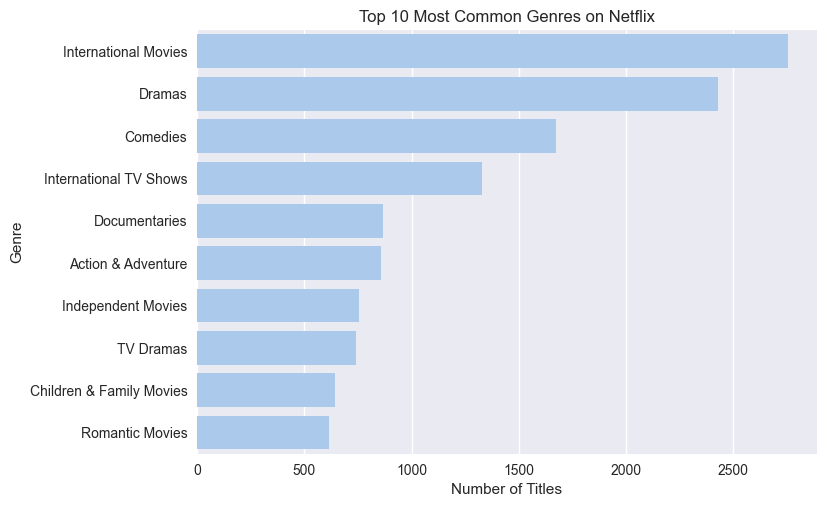

In [13]:
genres = df['listed_in'].dropna().str.split(', ').explode()
top_genres = genres.value_counts().head(10)
sns.barplot(y=top_genres.index, x=top_genres.values)
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


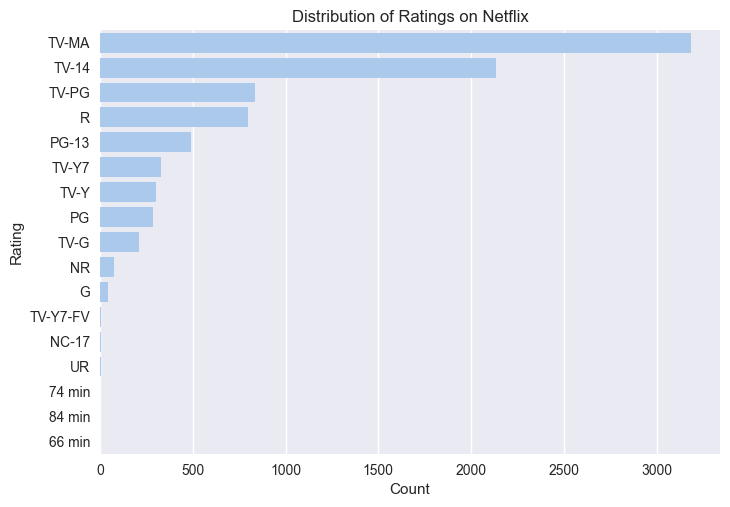

In [14]:
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title("Distribution of Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()
